In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

Implement the K-means++ function return the labels and centers

In [17]:
class KMeans:
  def __init__(self, clusters):
    self.K = clusters
  
  # KMeans ++ initialization by finding the furthest points
  def initialize(self, seed):
    if seed == True:
      np.random.seed(2)
    random_idx = np.random.randint(self.data.shape[0])
    self.centroids.append(self.data[random_idx])

    for cent in range(self.K - 1):
      distance_list = []

      for point in self.data:
        d = float("inf")
        for centroid in self.centroids:
          temp_dist = self.euclidean_distance(point, centroid)
          d = min(d, temp_dist)
        distance_list.append(d)
      distance_list = np.array(distance_list)
      new_centroid = self.data[np.argmax(distance_list), :]
      self.centroids.append(new_centroid)
      distance_list = []
    return self.centroids

  def euclidean_distance(self, a, b):
    return np.sqrt(np.sum((a - b) ** 2))
  
  # closest centroid from the given point
  def closest_center(self, val):
    distances = []
    for centroid in self.centroids:
      distances.append(self.euclidean_distance(val, centroid))
    best_idx = distances.index(min(distances))
    return best_idx

  # create clusters based on given centroids, returns index
  def create_clusters(self, m):
    clusters = [[] for i in range(self.K)]
    for idx in range(m):
      closest_centroid_idx = self.closest_center(self.data[idx])
      clusters[closest_centroid_idx].append(idx)
    return clusters

  # generate new centroids based on clusters
  def new_centroids(self):
    new_centroid = []
    for cluster in self.clusters:
      cluster_avg = np.mean(self.data[cluster], axis = 0)
      new_centroid.append(cluster_avg)
    return new_centroid

  # get clusters for each index
  def get_labels(self, m):
    labels = np.empty(m)
    for cluster_idx, cluster in enumerate(self.clusters):
      for data_idx in cluster:
        labels[data_idx] = cluster_idx
    return labels
  
  # fit the data set
  def fit(self, X, max_iterations, seed):
    self.max_iterations = max_iterations
    self.centroids = []
    self.clusters = [[] for k in range(self.K)]
    self.data = X
    m, n = X.shape

    self.centroids = self.initialize(seed)
    
    for i in range(self.max_iterations):
      self.clusters = self.create_clusters(m)
      old_centroids = self.centroids
      self.centroids = self.new_centroids()

      distances = []
      for i in range(len(self.centroids)):
        distances.append(self.euclidean_distance(old_centroids[i], self.centroids[i]))
      
      if (sum(distances) == 0):
        break
    return self.get_labels(m), self.centroids

  # plot the clusters
  def plot(self):
      fig, ax = plt.subplots(figsize=(12, 8))

      for i, index in enumerate(self.clusters):
          point = self.data[index].T
          ax.scatter(*point)

      for point in self.centroids:
          ax.scatter(*point, marker="x", color="black", linewidth=2)

      plt.show()  

In [18]:
# synthetic data generation
X, y = make_blobs(n_samples = 300, centers = 4, cluster_std = 0.6, random_state = 4)

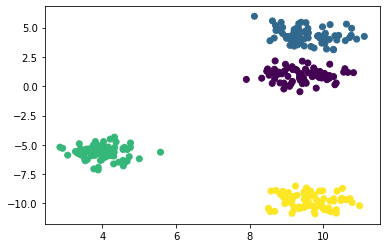

In [19]:
# plotting the data generated
plt.scatter(X[:, 0], X[:, 1], c=y)

In [20]:
k = KMeans(4)

Fit the model on the dataset (default seed) and plot the figure

In [32]:
# fitting with default seed
y_pred, centers = k.fit(X, 100, False)

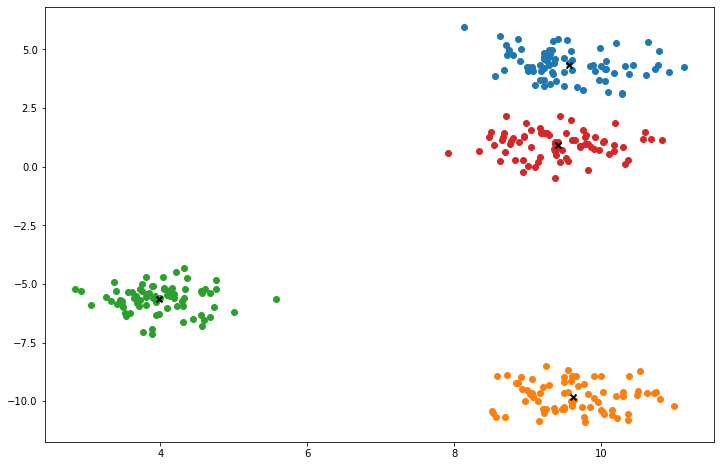

In [33]:
k.plot()

Fit the model on the dataset (seed=2), plot the figure and compare the results from 8 and 9. Are there any differences? If yes, why?
- Depending on the original positions of the centroid, it may take more or less time for the centroids to converge.
- Seed = 2 can help us see that as it makes the results reproducible.
- With seed = 2 and max_iterations = 100, the centroids converge within 100 iterations. However, with random seed and max_iterations = 100, the centroids may not always converge.

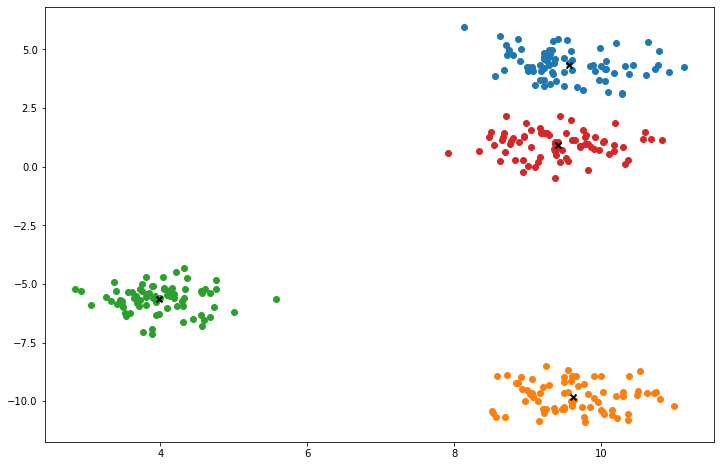

In [34]:
# fitting with seed = 2
y2_pred, centers2 = k.fit(X, 50, True)
k.plot()

Compare the results from 4,5,8 and 9. State your observations. 
- Initialization via KMeans++ can be computationally expensive. However, it takes less time / max_iterations to converge as compared to KMeans.
- Seed = 2 makes the results reproducible. Depending on the intialization via random seed, it may or may not take less time to converge. 

In [24]:
from PIL import Image 
# import cv2 to load the image
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
from numpy import asarray

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


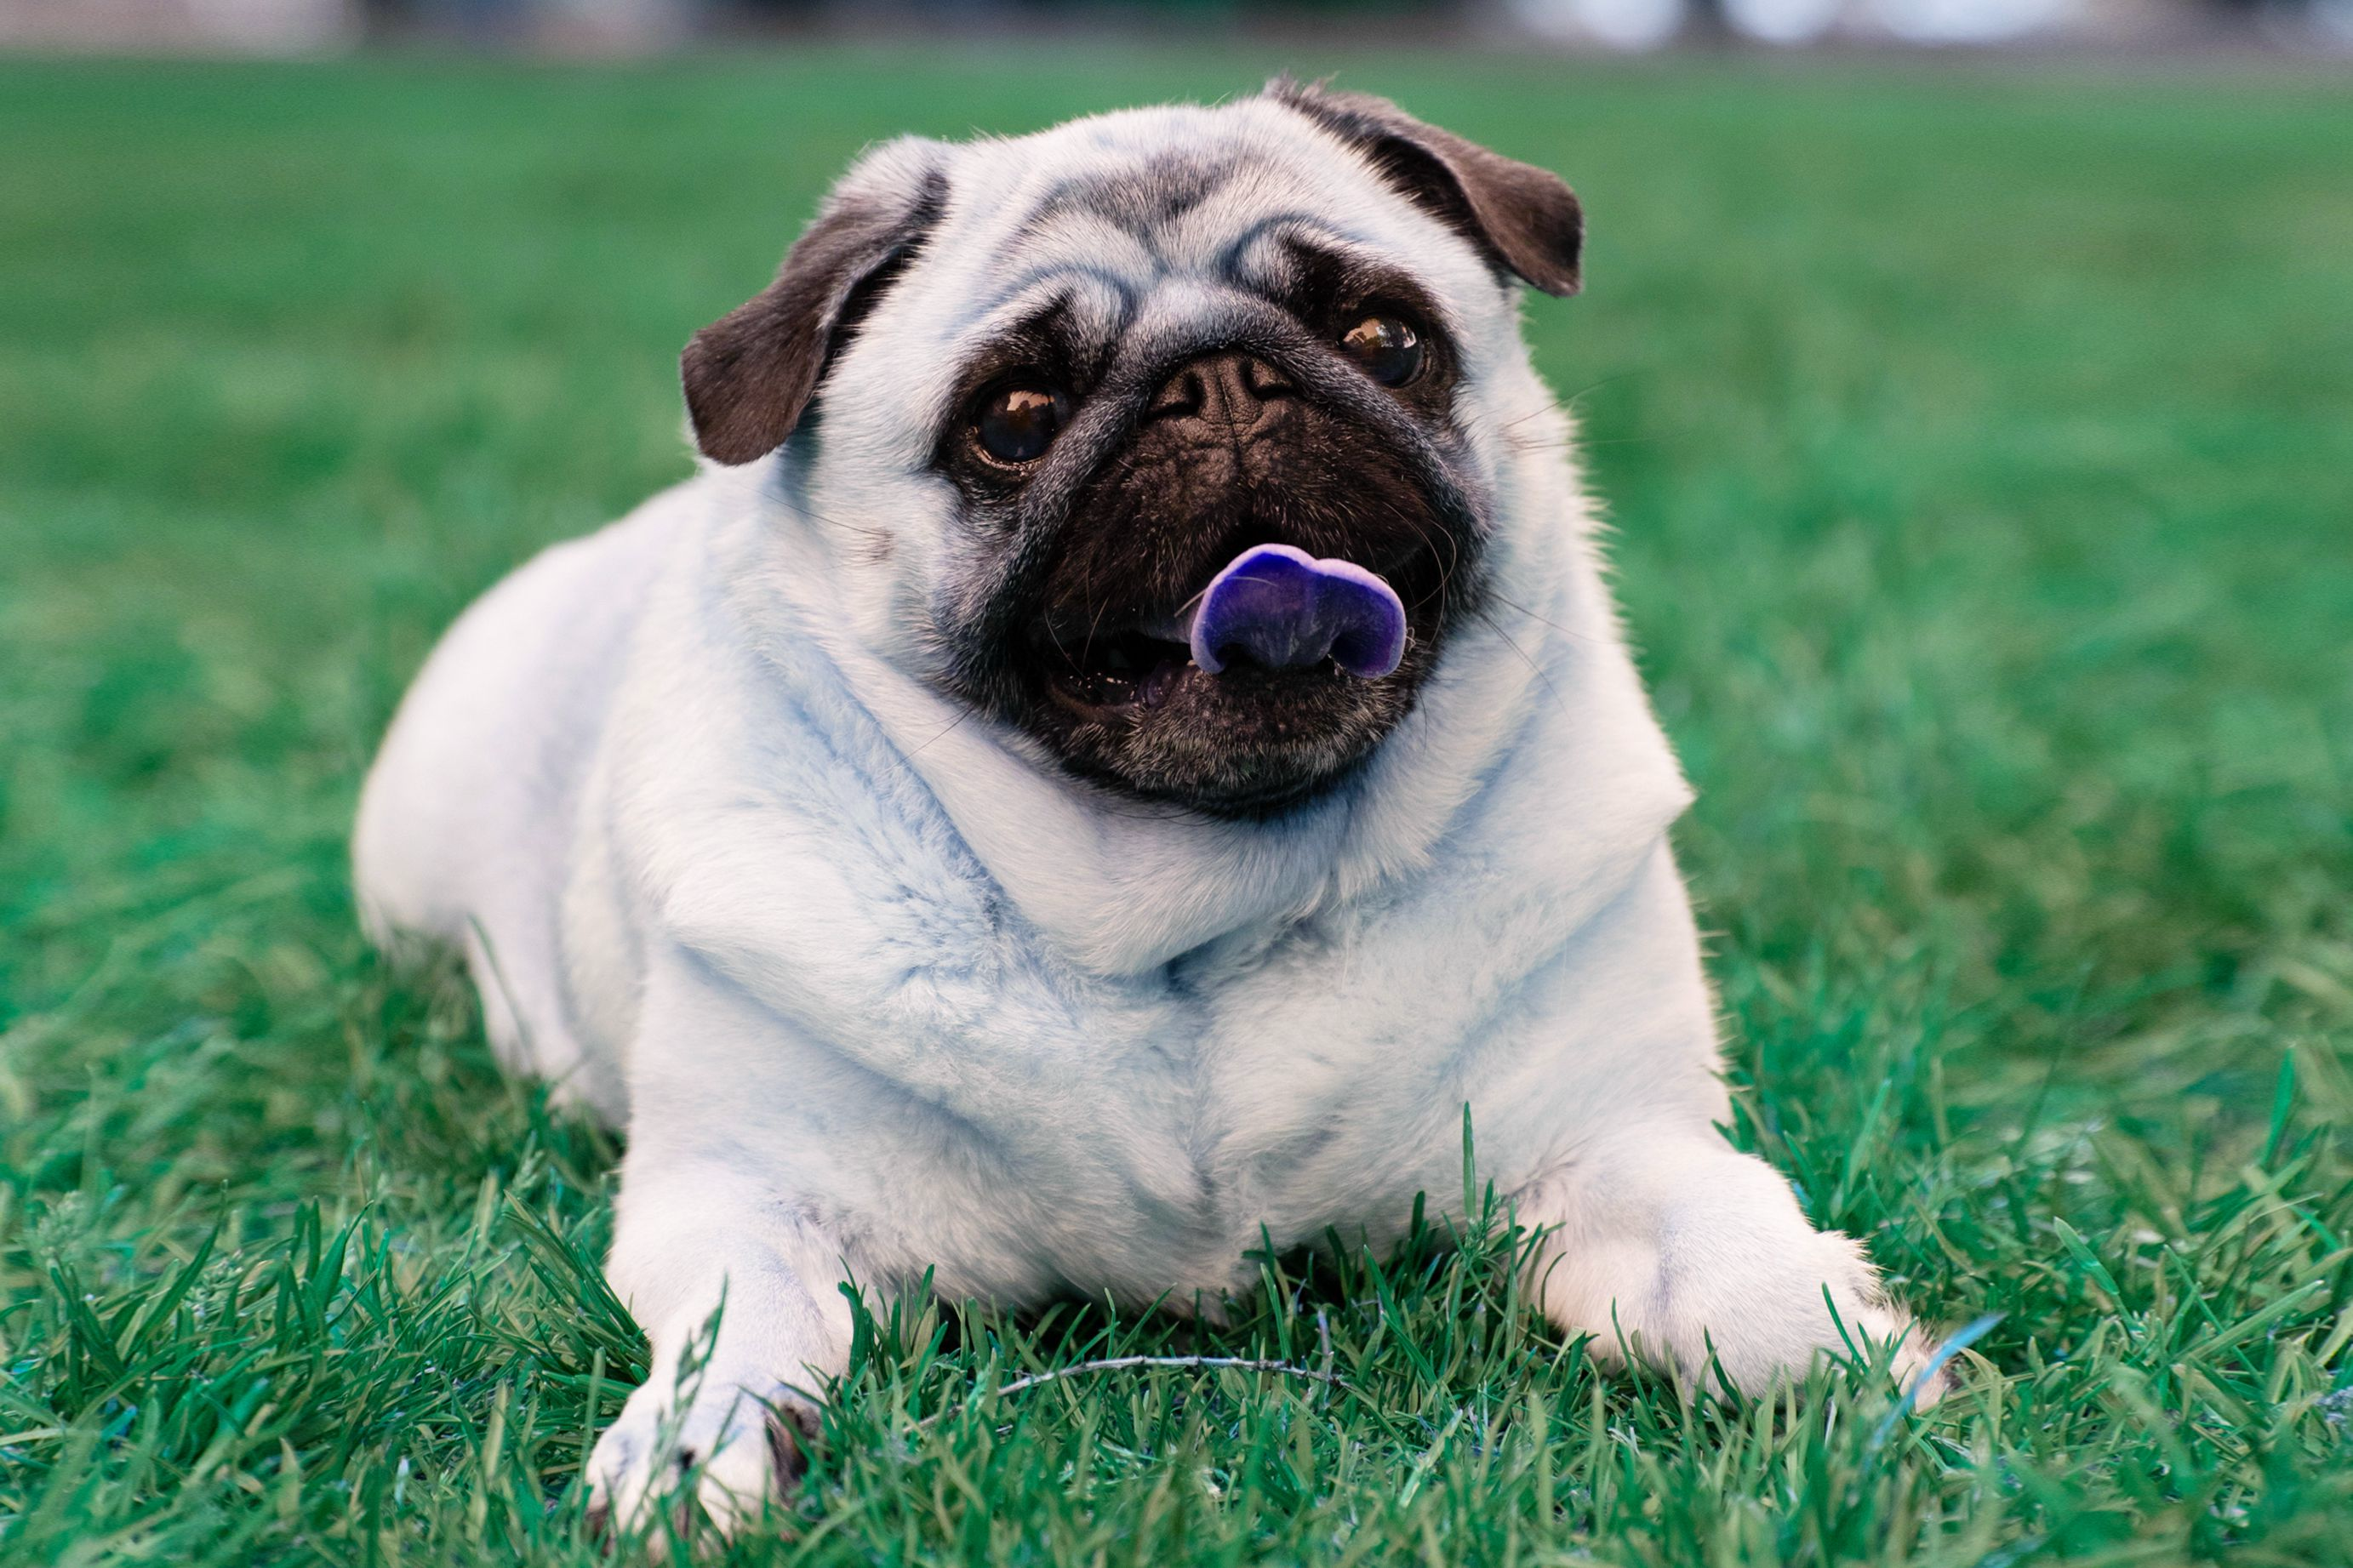

In [26]:
img = cv2.imread("/content/drive/MyDrive/Applied ML/Lab-4/img.jpeg")
# converting image to rgb, displaying
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(img)

In [27]:
# converting image to 2D
rows = img.shape[0]
cols = img.shape[1]
img = img / 255
flattened_img = img.reshape(rows*cols, 3)

In [28]:
num_clusters = 3
k2 = KMeans(num_clusters)

In [29]:
# fitting the data
y_pred_img, centers_img = k2.fit(flattened_img, 50, None)

In [30]:
# converting the compressed image to 3D
recovered_img = np.array(centers_img)[y_pred_img.astype(int)]
recovered_img = np.reshape(recovered_img, (rows, cols, 3))
print(np.shape(recovered_img))

(1843, 2765, 3)


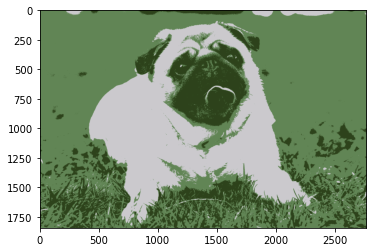

In [31]:
# displaying the image
plt.imshow(recovered_img)
plt.show()